In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/rachelgrigiac/Documents/CareerFoundry/Instacart Basket Analysis'

In [4]:
# Importing data
ords_prods_cust = pd.read_pickle(os.path.join( path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

In [5]:
ords_prods_cust.head()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,average_price,spending_flag,order_frequency,frequency_flag,gender,state,age,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423


# 2. Security Implications

The PII data issues have been addressed in the previous exercise. It was the name and surname columns that have been dropped as they are not necessary for the analysis.

# 3. Create a regional segmentation

In [6]:
# Define a function to map states to regions using if statements

def region_label (row):
    if row ['state'] in ('Maine','New Hampshire','Vermont','Massachusetts','Rhode Island', 'Connecticut','New York','Pennsylvania','New Jersey'):
       return 'Northeast'
    elif row ['state'] in ('Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri'):
       return 'Midwest'
    elif row ['state'] in ('Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee', 'Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana'):
        return 'South'
    elif row ['state'] in ('Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii'):
        return 'West'
    else: return 'na'

In [7]:
# Create new column
ords_prods_cust['region'] = ords_prods_cust.apply(region_label, axis=1)

In [8]:
ords_prods_cust.head()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,spending_flag,order_frequency,frequency_flag,gender,state,age,n_dependants,fam_status,income,region
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South
2,473747,1,3,3,12,21.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South
4,431534,1,5,4,15,28.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South


In [9]:
ords_prods_cust['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [10]:
len(ords_prods_cust)

32404859

In [11]:
crosstab = pd.crosstab(ords_prods_cust['spending_flag'],ords_prods_cust['region'], dropna = False)

In [12]:
crosstab

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,155975,108225,209691,160354
Low spender,7441350,5614511,10582194,8132559


In [13]:
# Saving it on excel
crosstab.to_clipboard()

# 4. Excluding Low-Activity Customers

In [15]:
# Create a 'low_activity' column
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'low_activity'] = 'True'

In [16]:
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'low_activity'] = 'False'

In [17]:
ords_prods_cust['low_activity'].value_counts()

low_activity
False    30964564
True      1440295
Name: count, dtype: int64

In [18]:
# Creating sample
df_exclusion = ords_prods_cust[ords_prods_cust['low_activity']== 'False']

In [19]:
# Checking result
len(df_exclusion)

30964564

In [20]:
# Export the sample
df_exclusion.to_pickle(os.path.join(path, '02 Data','Prepared Data','regular_custs.pkl'))

#### Before starting next exercise I will combine the departments dataset into the current one.

In [21]:
# Importing the departments data set to include to the current dataframe
deps = pd.read_csv(os.path.join( path, '02 Data', 'Original Data', 'departments.csv'))

In [22]:
deps.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [23]:
# Transposing the dataframe
deps_t = deps.T

In [24]:
deps_t

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [25]:
deps_t.reset_index(inplace=True)

In [26]:
deps_t.columns = deps_t.iloc[0]

In [27]:
deps_t = deps_t.drop(0)

In [28]:
deps_t

,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [29]:
# Before merging dataframe I need to make sure both department_id columns have the same datatype
deps_t['department_id'] = deps_t['department_id'].astype(int)

In [30]:
# Combining data
df_merged = df_exclusion.merge(deps_t, on='department_id', indicator=True)

In [32]:
# Checking the result
df_merged['_merge'].value_counts()

_merge
both          30964564
left_only            0
right_only           0
Name: count, dtype: int64

In [33]:
# Dropping the '_merge' column
df_merged = df_merged.drop(columns =['_merge'])

In [36]:
df_merged['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

In [40]:
# Exporting the data
df_merged.to_pickle(os.path.join( path, '02 Data', 'Prepared Data', 'instacart_merged.pkl'))

# 5. Customer Profiling

In [4]:
# Importing data
df_merged = pd.read_pickle(os.path.join( path, '02 Data', 'Prepared Data', 'instacart_merged.pkl'))

In [13]:
len(df_merged)

30964564

#### Creating flag for age

In [4]:
#Create age_flag
df_merged.loc[(df_merged['age'] >= 18) & (df_merged['age'] <= 29), 'age_flag'] = 'Young Adult'

In [5]:
df_merged.loc[(df_merged['age'] >= 30) & (df_merged['age'] <= 44), 'age_flag'] = 'Adult'

In [6]:
df_merged.loc[(df_merged['age'] >= 45) & (df_merged['age'] <= 59), 'age_flag'] = 'Middle-Aged Adult'

In [7]:
df_merged.loc[df_merged['age'] >= 60, 'age_flag'] = 'Senior'

In [16]:
df_merged['age_flag'].value_counts(dropna=False)

age_flag
Senior               10574504
Middle-Aged Adult     7311091
Adult                 7261366
Young Adult           5817603
Name: count, dtype: int64

In [20]:
df_merged['age_flag'].describe()

count     30964564
unique           4
top         Senior
freq      10574504
Name: age_flag, dtype: object

#### Creating a flag for income

In [23]:
#Create an income_flag
df_merged.loc[df_merged['income'] < 50000, 'income_flag'] = 'Low Income'

In [24]:
df_merged.loc[(df_merged['income'] >= 50000) & (df_merged['income'] < 75000), 'income_flag'] = 'Medium-Low Income'

In [25]:
df_merged.loc[(df_merged['income'] >= 75000) & (df_merged['income'] < 100000), 'income_flag'] = 'Medium Income'

In [26]:
df_merged.loc[(df_merged['income'] >= 100000) & (df_merged['income'] < 125000), 'income_flag'] = 'Medium-High Income'

In [27]:
df_merged.loc[df_merged['income'] >= 125000, 'income_flag'] = 'High Income'

In [28]:
df_merged['income_flag'].value_counts(dropna=False)

income_flag
High Income           8278044
Medium Income         6850482
Medium-Low Income     6544126
Medium-High Income    5929358
Low Income            3362554
Name: count, dtype: int64

In [31]:
df_merged['income_flag'].describe()

count        30964564
unique              5
top       High Income
freq          8278044
Name: income_flag, dtype: object

#### Creating flag for living situation (alone or with family)

In [36]:
df_merged.loc[df_merged['n_dependants'] == 0, 'living_flag']= 'Alone'

In [37]:
df_merged.loc[df_merged['n_dependants'] > 0, 'living_flag']= 'With Family'

In [39]:
df_merged['living_flag'].value_counts(dropna=False)

living_flag
With Family    23224883
Alone           7739681
Name: count, dtype: int64

In [41]:
df_merged['living_flag'].describe()

count        30964564
unique              2
top       With Family
freq         23224883
Name: living_flag, dtype: object

In [42]:
# Exporting the data
df_merged.to_pickle(os.path.join( path, '02 Data', 'Prepared Data', 'instacart_merged2.pkl'))

In [3]:
# Importing the data
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_merged2.pkl'))

# 6. Distribution of Profiles

In [69]:
# Drop duplicate user_id to consider each user only once
unique_users = df_merged.drop_duplicates(subset='user_id')

In [57]:
age_flag_counts = unique_users['age_flag'].value_counts()

In [70]:
custom_colors = ['#a6c9e2', '#ff9999', '#b3e6cc', '#ffdb99']

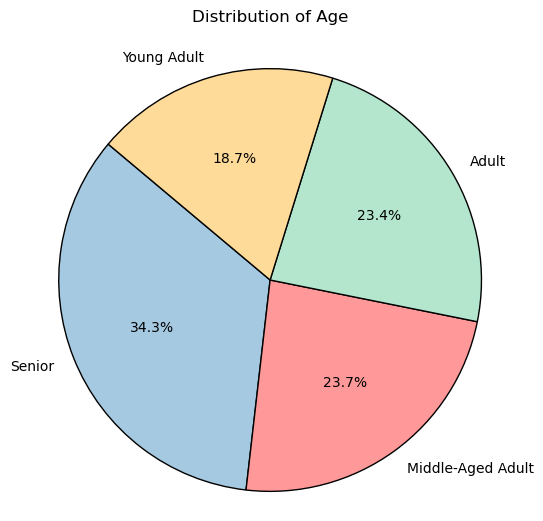

In [143]:
plt.figure(figsize=(6, 6))
plt.pie(age_flag_counts, labels=age_flag_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Age', loc='center', pad=20)
plt.axis('equal')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','age_distribution_pie_chart.png')) #Saving the chart
plt.show()

In [142]:
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','age_distribution_pie_chart.png'),bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [90]:
df_sorted = unique_users['income_flag'].value_counts().sort_values(ascending=False).index

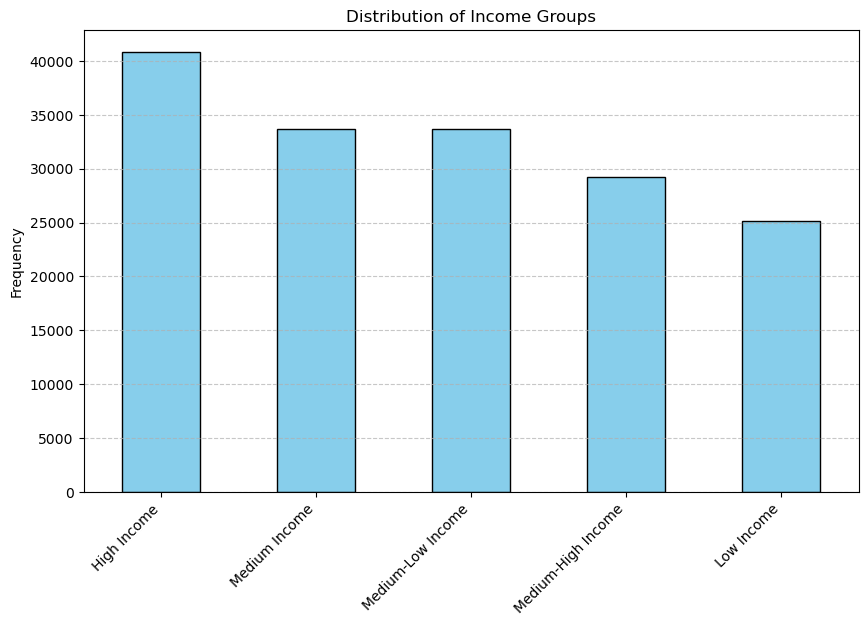

In [146]:
plt.figure(figsize=(10, 6))
unique_users['income_flag'].value_counts().reindex(df_sorted).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Income Groups')
plt.ylabel('Frequency')
plt.xlabel('')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','income_distribution_histogram.png'),bbox_inches='tight') #Saving the chart
plt.show()

In [94]:
living_flag_counts = unique_users['living_flag'].value_counts()

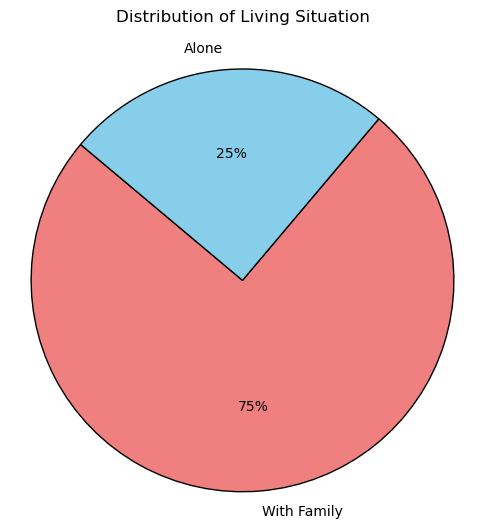

In [147]:
plt.figure(figsize=(6, 6))
plt.pie(living_flag_counts, labels=living_flag_counts.index, autopct='%1.0f%%', startangle=140, colors=['lightcoral', 'skyblue'], wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Living Situation',loc='center', pad=20)
plt.axis('equal')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','living_distribution_pie.png'),bbox_inches='tight') #Saving the chart
plt.show()

### Loyal customers

In [14]:
crosstab4 = pd.crosstab(unique_users['age_flag'],unique_users['loyalty_flag'], dropna = False)

In [15]:
crosstab4

loyalty_flag,Loyal customer,New customer,Regular customer
age_flag,,,
Adult,3966,16129,17917
Middle-Aged Adult,4060,16293,18117
Senior,5856,23476,26441
Young Adult,3135,12852,14389


In [69]:
crosstab4_normalized = crosstab4.div(crosstab4.sum(axis=1), axis=0) * 100

In [71]:
crosstab4_normalized

loyalty_flag,Loyal customer,New customer,Regular customer
age_flag,,,
Adult,10.433547,42.431337,47.135115
Middle-Aged Adult,10.553678,42.352482,47.093839
Senior,10.499704,42.092052,47.408244
Young Adult,10.320648,42.309718,47.369634


<Figure size 800x1000 with 0 Axes>

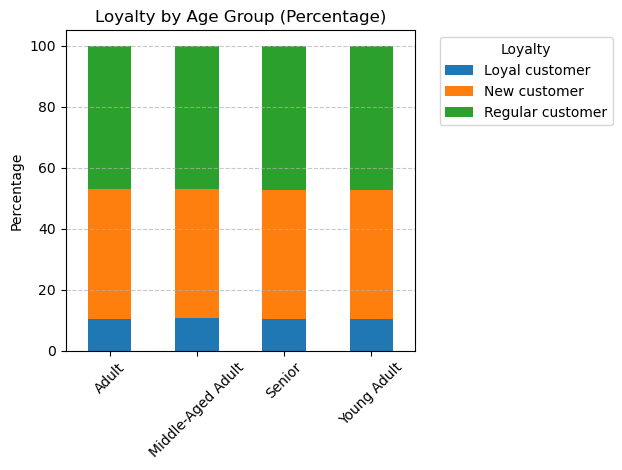

In [79]:
plt.figure(figsize=(8, 10)) 
crosstab4_normalized.plot(kind='bar', stacked=True)
plt.title('Loyalty by Age Group (Percentage)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Loyalty',loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','loyalty_by_age.png'),bbox_inches='tight')
plt.show()

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df_merged.head()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,order_frequency,frequency_flag,gender,state,age,n_dependants,fam_status,income,region,low_activity,department,age_flag,income_flag,living_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,False,beverages,Adult,Low Income,With Family
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Regularly busy,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,False,beverages,Adult,Low Income,With Family
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Regularly busy,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,False,beverages,Adult,Low Income,With Family
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Least busy,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,False,beverages,Adult,Low Income,With Family
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Least busy,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,False,beverages,Adult,Low Income,With Family


In [12]:
unique_users['frequency_flag'].value_counts()

frequency_flag
Frequent customer        75927
Regular customer         50039
Non-frequent customer    36665
Name: count, dtype: int64

In [58]:
crosstab5 = pd.crosstab(unique_users['income_flag'],unique_users['loyalty_flag'], dropna = False)

In [46]:
crosstab5

loyalty_flag,Loyal customer,New customer,Regular customer
income_flag,,,
High Income,4425,16708,19682
Low Income,2127,11962,11103
Medium Income,3631,13886,16203
Medium-High Income,3240,12007,14019
Medium-Low Income,3594,14187,15857


In [49]:
crosstab5_normalized = crosstab5.div(crosstab5.sum(axis=1), axis=0) * 100

In [50]:
crosstab5_normalized

loyalty_flag,Loyal customer,New customer,Regular customer
income_flag,,,
High Income,10.841602,40.935930,48.222467
Low Income,8.443157,47.483328,44.073515
Medium Income,10.768090,41.180308,48.051601
Medium-High Income,11.070867,41.027130,47.902002
Medium-Low Income,10.684345,42.175516,47.140139


<Figure size 800x1000 with 0 Axes>

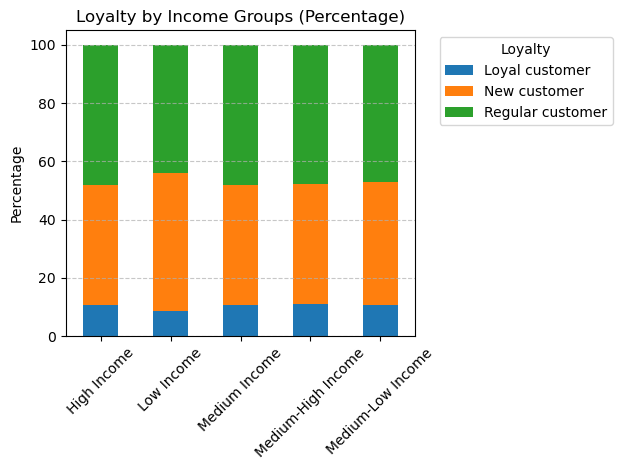

In [78]:
plt.figure(figsize=(8, 10)) 
crosstab5_normalized.plot(kind='bar', stacked=True)
plt.title('Loyalty by Income Groups (Percentage)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Loyalty',loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','loyalty_by_income.png'),bbox_inches='tight')
plt.show()

In [59]:
crosstab6 = pd.crosstab(unique_users['living_flag'],unique_users['loyalty_flag'], dropna = False)

In [60]:
crosstab6

loyalty_flag,Loyal customer,New customer,Regular customer
living_flag,,,
Alone,4267,17256,19204
With Family,12750,51494,57660


In [63]:
crosstab6_normalized = crosstab6.div(crosstab6.sum(axis=1), axis=0) * 100

In [64]:
crosstab6_normalized

loyalty_flag,Loyal customer,New customer,Regular customer
living_flag,,,
Alone,10.477079,42.369927,47.152994
With Family,10.459050,42.241436,47.299514


<Figure size 800x1000 with 0 Axes>

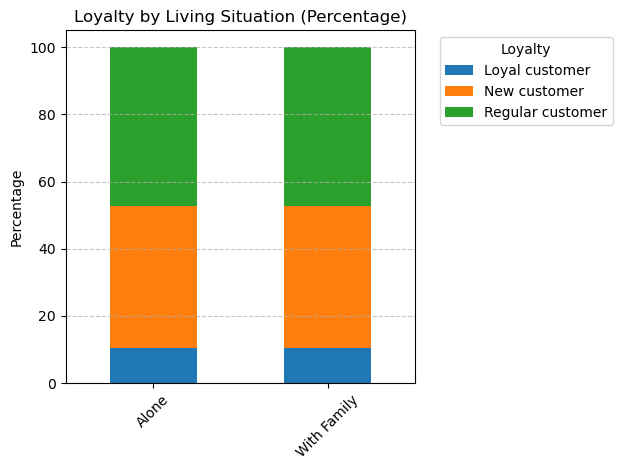

In [77]:
plt.figure(figsize=(8, 10)) 
crosstab6_normalized.plot(kind='bar', stacked=True)
plt.title('Loyalty by Living Situation (Percentage)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Loyalty',loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','loyalty_by_living.png'),bbox_inches='tight')
plt.show()

#### Frequency

In [93]:
crosstab7 = pd.crosstab(unique_users['frequency_flag'],unique_users['loyalty_flag'], dropna = False)

In [94]:
crosstab7

loyalty_flag,Loyal customer,New customer,Regular customer
frequency_flag,,,
Frequent customer,17008,18184,40735
Non-frequent customer,0,29625,7040
Regular customer,9,20941,29089


In [82]:
crosstab7_normalized = crosstab7.div(crosstab7.sum(axis=1), axis=0) * 100

In [83]:
crosstab7_normalized

loyalty_flag,Loyal customer,New customer,Regular customer
frequency_flag,,,
Frequent customer,22.400464,23.949320,53.650217
Non-frequent customer,0.000000,80.799127,19.200873
Regular customer,0.017986,41.849358,58.132657


<Figure size 800x600 with 0 Axes>

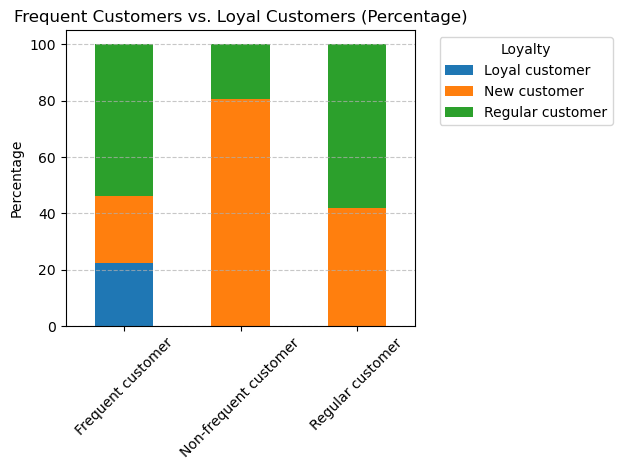

In [91]:
plt.figure(figsize=(8, 6))  
crosstab7_normalized.plot(kind='bar', stacked=True,)
plt.title('Frequent Customers vs. Loyal Customers (Percentage)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Loyalty', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','frequent_vs_loyal.png'),bbox_inches='tight')
plt.show()

### Type of spenders

In [33]:
#Analyzing the relationship between types of spenders and age groups
crosstab8 = pd.crosstab(unique_users['age_flag'],unique_users['spending_flag'], dropna = False)

In [10]:
crosstab8

spending_flag,High spender,Low spender
age_flag,,
Adult,850,37162
Middle-Aged Adult,937,37533
Senior,1248,54525
Young Adult,666,29710


In [11]:
#In percentage
crosstab8_normalized = crosstab8.div(crosstab8.sum(axis=1), axis=0) * 100

In [12]:
crosstab8_normalized

spending_flag,High spender,Low spender
age_flag,,
Adult,2.236136,97.763864
Middle-Aged Adult,2.435664,97.564336
Senior,2.237642,97.762358
Young Adult,2.192520,97.807480


<Figure size 800x1000 with 0 Axes>

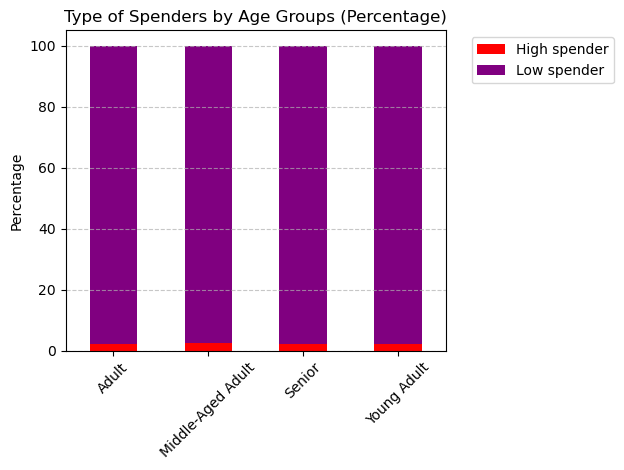

In [35]:
#Visualization
plt.figure(figsize=(8, 10)) 
crosstab8_normalized.plot(kind='bar', stacked=True, color=['red', 'purple'])
plt.title('Type of Spenders by Age Groups (Percentage)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='',loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','spenders_by_age.png'),bbox_inches='tight')
plt.show()

In [22]:
#Analyzing the relationship between types of spenders and income groups
crosstab9 = pd.crosstab(unique_users['income_flag'],unique_users['spending_flag'], dropna = False)

In [23]:
crosstab9

spending_flag,High spender,Low spender
income_flag,,
High Income,2107,38708
Low Income,33,25159
Medium Income,569,33151
Medium-High Income,554,28712
Medium-Low Income,438,33200


In [24]:
crosstab9_normalized = crosstab9.div(crosstab9.sum(axis=1), axis=0) * 100

In [25]:
crosstab9_normalized

spending_flag,High spender,Low spender
income_flag,,
High Income,5.162318,94.837682
Low Income,0.130994,99.869006
Medium Income,1.687426,98.312574
Medium-High Income,1.892982,98.107018
Medium-Low Income,1.302099,98.697901


<Figure size 800x1000 with 0 Axes>

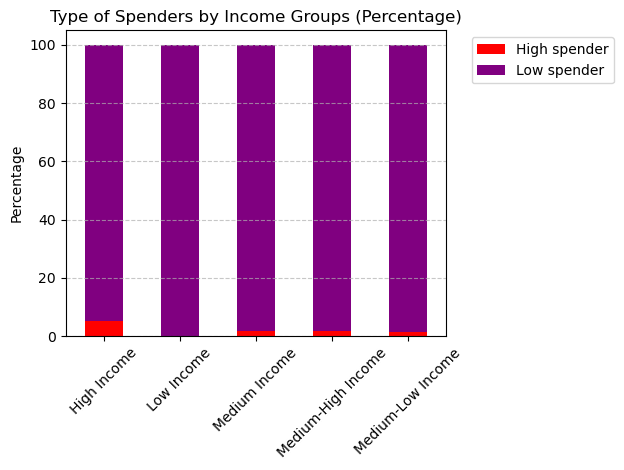

In [36]:
plt.figure(figsize=(8, 10)) 
crosstab9_normalized.plot(kind='bar', stacked=True, color=['red', 'purple'])
plt.title('Type of Spenders by Income Groups (Percentage)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='',loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','spenders_by_income.png'),bbox_inches='tight')
plt.show()

In [29]:
#Analyzing the relationship between types of spenders and living situation
crosstab10 = pd.crosstab(unique_users['living_flag'],unique_users['spending_flag'], dropna = False)

In [30]:
crosstab10

spending_flag,High spender,Low spender
living_flag,,
Alone,926,39801
With Family,2775,119129


In [31]:
crosstab10_normalized = crosstab10.div(crosstab10.sum(axis=1), axis=0) * 100

In [32]:
crosstab10_normalized

spending_flag,High spender,Low spender
living_flag,,
Alone,2.273676,97.726324
With Family,2.276381,97.723619


<Figure size 800x1000 with 0 Axes>

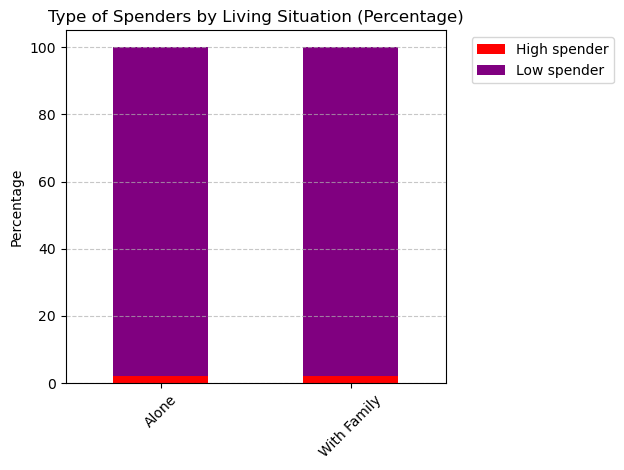

In [38]:
plt.figure(figsize=(8, 10)) 
crosstab10_normalized.plot(kind='bar', stacked=True, color=['red', 'purple'])
plt.title('Type of Spenders by Living Situation (Percentage)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='',loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','spenders_by_living.png'),bbox_inches='tight')
plt.show()

### Days of the week

In [39]:
#Analyzing the relationship between age groups and days of the week
crosstab11 = pd.crosstab(unique_users['age_flag'],unique_users['busiest_days'], dropna = False)

In [40]:
crosstab11

busiest_days,Busiest Days,Regularly busy,Slowest Days
age_flag,,,
Adult,13239,15347,9426
Middle-Aged Adult,12945,15887,9638
Senior,19140,22785,13848
Young Adult,10405,12439,7532


In [41]:
crosstab11_normalized = crosstab11.div(crosstab11.sum(axis=1), axis=0) * 100

In [42]:
crosstab11_normalized

busiest_days,Busiest Days,Regularly busy,Slowest Days
age_flag,,,
Adult,34.828475,40.374092,24.797432
Middle-Aged Adult,33.649597,41.297115,25.053288
Senior,34.317681,40.853101,24.829218
Young Adult,34.254016,40.950092,24.795891


<Figure size 800x1000 with 0 Axes>

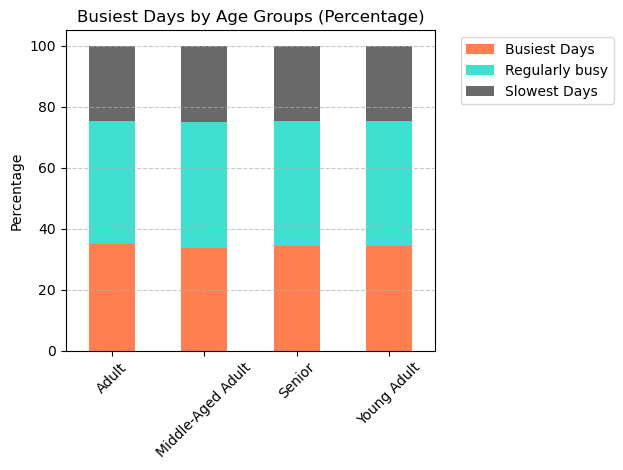

In [62]:
#Visualization
plt.figure(figsize=(8, 10)) 
crosstab11_normalized.plot(kind='bar', stacked=True, color=['coral', 'turquoise', 'dimgrey'])
plt.title('Busiest Days by Age Groups (Percentage)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='',loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','busiest_days_age.png'),bbox_inches='tight')
plt.show()

In [48]:
#Analyzing the relationship between days of week and income
crosstab12 = pd.crosstab(unique_users['income_flag'],unique_users['busiest_days'], dropna = False)

In [49]:
crosstab12

busiest_days,Busiest Days,Regularly busy,Slowest Days
income_flag,,,
High Income,14061,16765,9989
Low Income,8234,10224,6734
Medium Income,11793,13702,8225
Medium-High Income,10111,12035,7120
Medium-Low Income,11530,13732,8376


In [50]:
crosstab12_normalized = crosstab12.div(crosstab12.sum(axis=1), axis=0) * 100

In [51]:
crosstab12_normalized

busiest_days,Busiest Days,Regularly busy,Slowest Days
income_flag,,,
High Income,34.450570,41.075585,24.473845
Low Income,32.684979,40.584312,26.730708
Medium Income,34.973310,40.634638,24.392052
Medium-High Income,34.548623,41.122805,24.328572
Medium-Low Income,34.276711,40.822879,24.900410


<Figure size 800x1000 with 0 Axes>

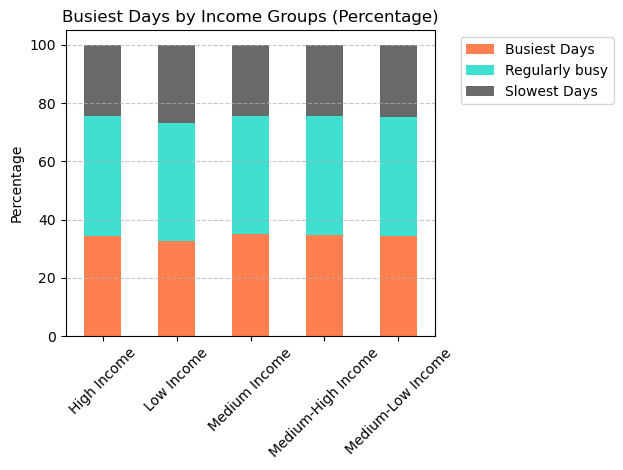

In [63]:
#Visualization
plt.figure(figsize=(8, 10)) 
crosstab12_normalized.plot(kind='bar', stacked=True, color=['coral', 'turquoise', 'dimgrey'])
plt.title('Busiest Days by Income Groups (Percentage)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='',loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','busiest_days_income.png'),bbox_inches='tight')
plt.show()

In [64]:
#Analyzing the relationship between busiest days and living situation
crosstab13 = pd.crosstab(unique_users['living_flag'],unique_users['busiest_days'], dropna = False)

In [65]:
crosstab13

busiest_days,Busiest Days,Regularly busy,Slowest Days
living_flag,,,
Alone,13966,16583,10178
With Family,41763,49875,30266


In [66]:
crosstab13_normalized = crosstab13.div(crosstab13.sum(axis=1), axis=0) * 100

In [67]:
crosstab13_normalized

busiest_days,Busiest Days,Regularly busy,Slowest Days
living_flag,,,
Alone,34.291747,40.717460,24.990792
With Family,34.258925,40.913342,24.827733


<Figure size 800x1000 with 0 Axes>

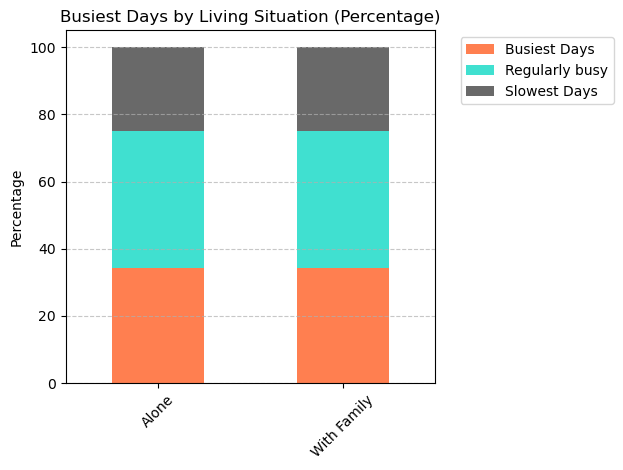

In [73]:
#Visualization
plt.figure(figsize=(8, 10)) 
crosstab13_normalized.plot(kind='bar', stacked=True, color=['coral', 'turquoise', 'dimgrey'])
plt.title('Busiest Days by Living Situation (Percentage)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='',loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','busiest_days_living.png'),bbox_inches='tight')
plt.show()

In [69]:
#Analyzing the relationship between loyalty and busiest days
crosstab14 = pd.crosstab(unique_users['loyalty_flag'],unique_users['busiest_days'], dropna = False)

In [70]:
crosstab14

busiest_days,Busiest Days,Regularly busy,Slowest Days
loyalty_flag,,,
Loyal customer,5442,7021,4554
New customer,23855,27944,16951
Regular customer,26432,31493,18939


In [71]:
crosstab14_normalized = crosstab14.div(crosstab14.sum(axis=1), axis=0) * 100

In [72]:
crosstab14_normalized

busiest_days,Busiest Days,Regularly busy,Slowest Days
loyalty_flag,,,
Loyal customer,31.979785,41.258741,26.761474
New customer,34.698182,40.645818,24.656000
Regular customer,34.388010,40.972367,24.639623


<Figure size 800x1000 with 0 Axes>

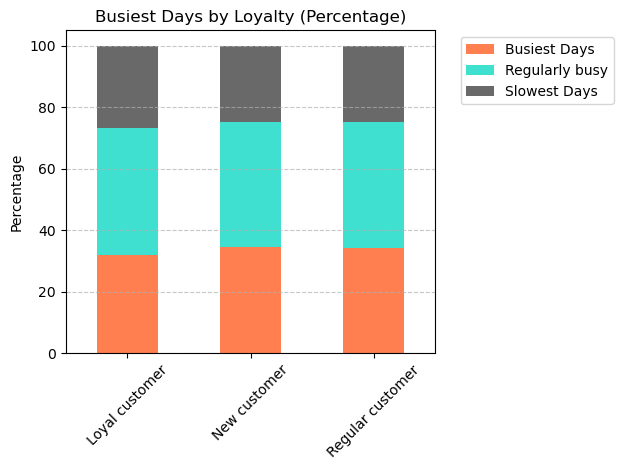

In [75]:
#Visualization
plt.figure(figsize=(8, 10)) 
crosstab14_normalized.plot(kind='bar', stacked=True, color=['coral', 'turquoise', 'dimgrey'])
plt.title('Busiest Days by Loyalty (Percentage)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='',loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','busiest_days_loyalty.png'),bbox_inches='tight')
plt.show()

# 7.Aggregating the max, mean and min variables on a customer-profile level

In [10]:
pd.set_option('display.max_columns', None)

In [12]:
df_merged.head()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,order_frequency,frequency_flag,gender,state,age,n_dependants,fam_status,income,region,low_activity,department,age_flag,income_flag,living_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,False,beverages,Adult,Low Income,With Family
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Regularly busy,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,False,beverages,Adult,Low Income,With Family
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Regularly busy,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,False,beverages,Adult,Low Income,With Family
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Least busy,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,False,beverages,Adult,Low Income,With Family
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Least busy,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,False,beverages,Adult,Low Income,With Family


In [4]:
# Calculate the total amount spent by each customer and assign it to a new column 'total_spent'
df_merged['total_spent'] = df_merged.groupby('user_id')['prices'].transform(np.sum)

/var/folders/y9/8n80fmjn4t70621k4d0spkzh0000gn/T/ipykernel_1945/681925994.py:2: FutureWarning: The provided callable <function sum at 0x10d7ed260> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_merged['total_spent'] = df_merged.groupby('user_id')['prices'].transform(np.sum)


In [5]:
df_merged['total_spent'].describe()

count    3.096456e+07
mean     3.418331e+03
std      2.927679e+03
min      5.000000e+00
25%      1.243800e+03
50%      2.536300e+03
75%      4.776800e+03
max      2.639490e+04
Name: total_spent, dtype: float64

In [44]:
df_merged.groupby('age_flag').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent                max_order        
                         mean   min      max      mean min max
age_flag                                                      
Adult                 3453.04   7.0  22696.9     34.52   5  99
Middle-Aged Adult     3409.12   5.0  21509.2     34.47   5  99
Senior                3407.55   6.8  26394.9     34.36   5  99
Young Adult           3406.19  10.5  18883.2     34.38   5  99

In [46]:
df_merged.groupby('income_flag').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent                max_order        
                          mean   min      max      mean min max
income_flag                                                    
High Income            3509.76  24.7  22595.5     34.57   5  99
Low Income             2525.92   5.0  24307.1     32.38   5  99
Medium Income          3557.42  39.4  21509.2     34.68   5  99
Medium-High Income     3545.56  38.6  26394.9     34.59   5  99
Medium-Low Income      3500.34  11.2  22696.9     34.87   5  99

In [48]:
df_merged.groupby('living_flag').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent               max_order        
                   mean  min      max      mean min max
living_flag                                            
Alone           3428.07  5.0  24307.1     34.68   5  99
With Family     3415.08  6.8  26394.9     34.34   5  99

In [50]:
df_merged.groupby('loyalty_flag').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent                 max_order        
                        mean    min      max      mean min max
loyalty_flag                                                  
Loyal customer       6153.84  156.0  26394.9     63.98  41  99
New customer          785.45    5.0   3920.4      7.49   5  10
Regular customer     2443.03   15.7  12186.6     23.43  11  40

In [52]:
df_merged.groupby('frequency_flag').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent                max_order        
                             mean   min      max      mean min max
frequency_flag                                                    
Frequent customer         4278.22  11.0  26394.9     43.63   5  99
Non-frequent customer      977.76   6.8   5672.0      9.18   5  25
Regular customer          1791.52   5.0  10682.7     16.63   5  45

In [55]:
df_merged.groupby('region').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent               max_order        
                 mean  min      max      mean min max
region                                               
Midwest       3358.50  7.0  26394.9     33.93   5  99
Northeast     3438.61  7.7  22777.9     34.60   5  99
South         3424.80  6.8  24307.1     34.48   5  99
West          3450.73  5.0  18910.0     34.68   5  99

In [58]:
df_merged.groupby('busiest_days').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent               max_order        
                      mean  min      max      mean min max
busiest_days                                              
Busiest Days       3411.56  5.0  26394.9     33.41   5  99
Regularly busy     3417.83  5.0  26394.9     34.50   5  99
Slowest Days       3429.69  5.0  26394.9     35.87   5  99

In [62]:
df_merged.groupby('busiest_period_of_day').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent               max_order        
                             mean  min      max      mean min max
busiest_period_of_day                                            
Average orders            3404.60  5.0  26394.9     34.37   5  99
Fewest orders             3412.34  7.0  26394.9     34.42   5  99
Most orders               3425.20  5.0  26394.9     34.45   5  99

# 8. Comparing customer profiles with regions and departments

In [4]:
# Grouping by 'region' and counting the number of unique 'user_id's
region_user_counts = df_merged.groupby('region')['user_id'].count()

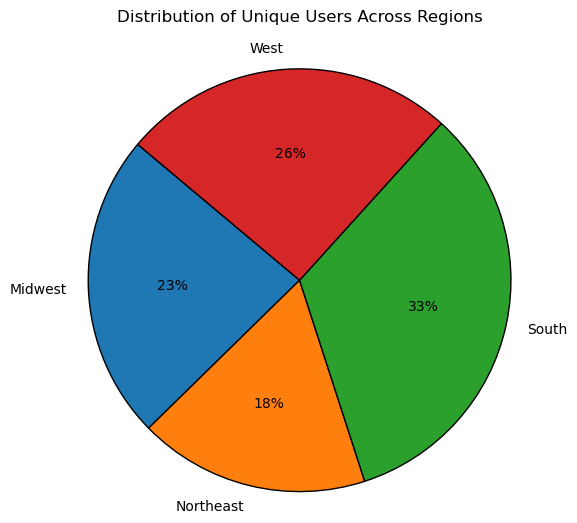

In [5]:
plt.figure(figsize=(6, 6))
plt.pie(region_user_counts, labels=region_user_counts.index, autopct='%1.0f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Unique Users Across Regions',loc='center', pad=20)
plt.axis('equal')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','region_distribution_pie.png'),bbox_inches='tight') #Saving the chart
plt.show()

In [6]:
# Group the data by 'region'
grouped = df_merged.groupby('region')

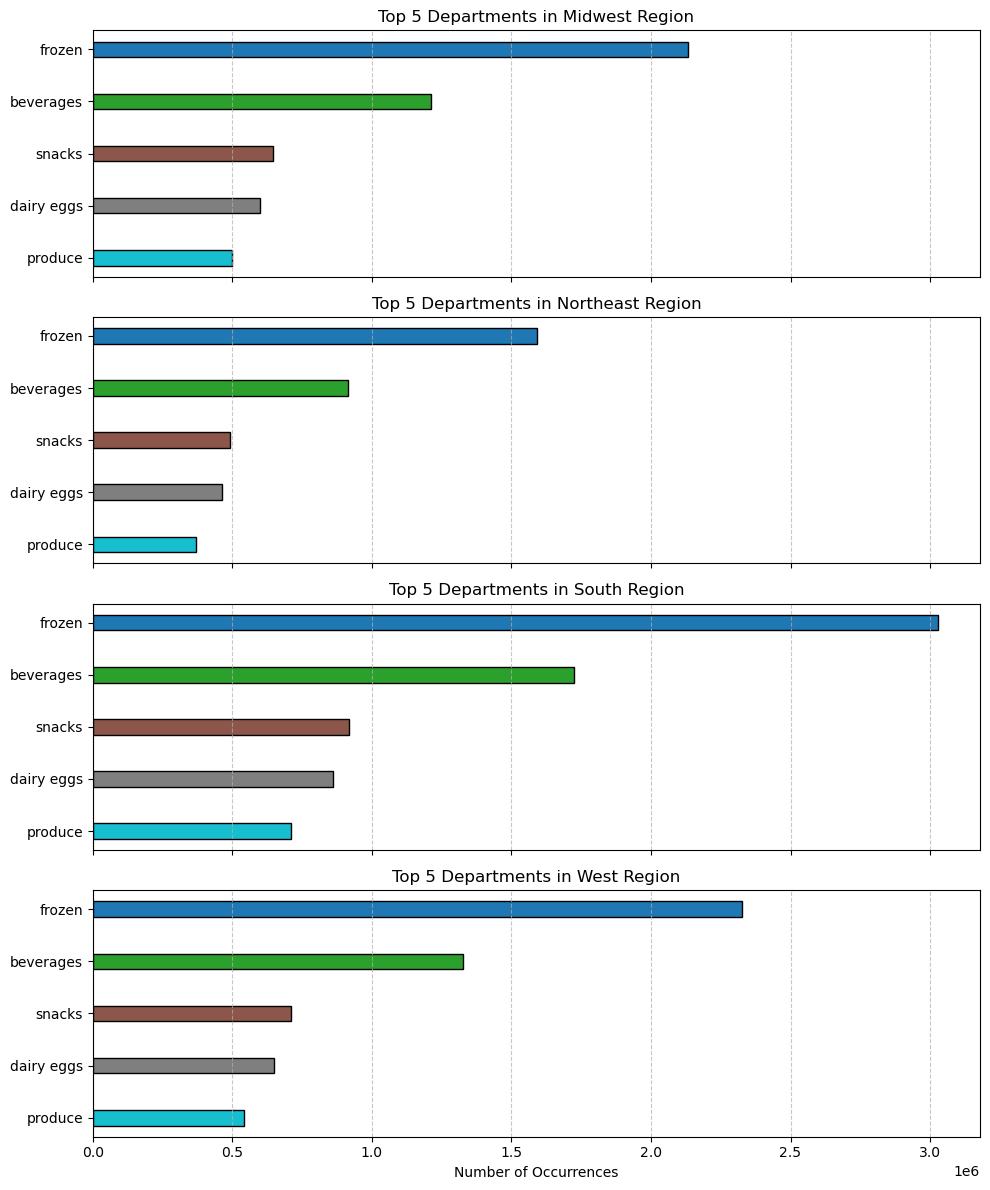

In [7]:
# Define colors for each department
colors = plt.cm.tab10(np.linspace(0, 1, 5))  

# Create subplots for each region
fig, axs = plt.subplots(nrows=len(grouped), ncols=1, figsize=(10, 12), sharex=True)

# Plotting the horizontal bar chart for each region
for i, (region, data) in enumerate(grouped):
    department_counts = data['department'].value_counts().head(5)
    
    axs[i].barh(np.arange(5), department_counts.values, color=colors, edgecolor='black', height=0.3)  # Set height to make bars thinner
    axs[i].set_yticks(np.arange(5))
    axs[i].set_yticklabels(department_counts.index[::-1])  # Reverse the order of departments
    axs[i].set_ylabel('')
    axs[i].set_title(f'Top 5 Departments in {region.capitalize()} Region')
    axs[i].grid(axis='x', linestyle='--', alpha=0.7)
    axs[i].invert_yaxis()  # Invert the y-axis to show the top department first

plt.xlabel('Number of Occurrences')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','top5_region.png'),bbox_inches='tight')
plt.show()

In [9]:
#Create a random patterns of 4
np.random.seed(4)

In [10]:
dev = np.random.rand(len(df_merged))<= 0.7

In [11]:
#Split in two samples
big = df_merged[dev]
small = df_merged[~dev]

In [14]:
len(df_merged)==len(big)+len(small)

True

In [35]:
#filter dataframe to only see fresh products
fresh_products = small[small['department_id'].isin([4, 12, 16])]
fresh_products = fresh_products[['department_id', 'department', 'order_hour_of_day', 'orders_day_of_week']]

In [36]:
grouped_fresh = fresh_products.groupby(['department_id', 'order_hour_of_day']).size().reset_index(name='order_count')

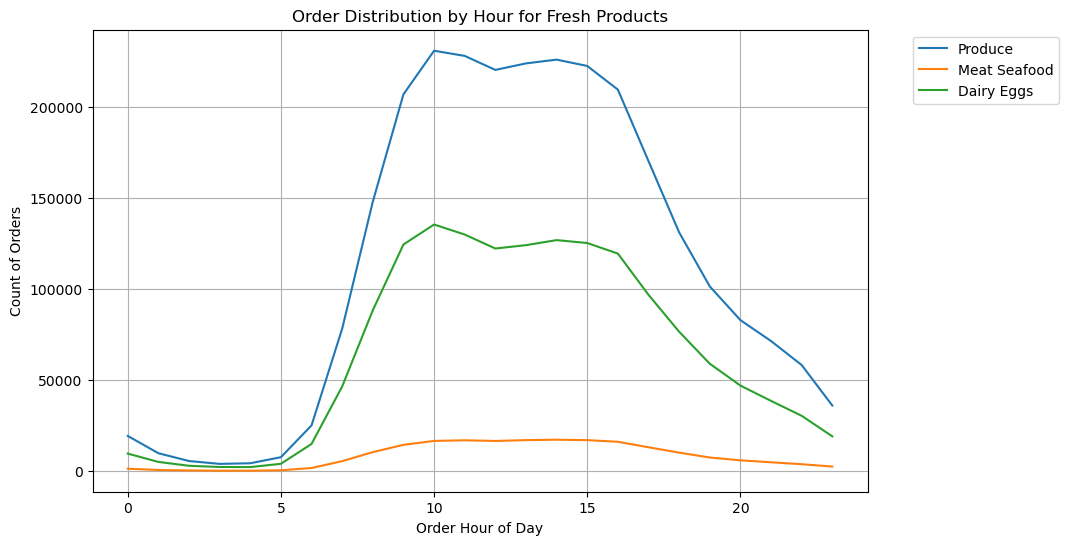

In [37]:
plt.figure(figsize=(10, 6))

for department_id, group in grouped_fresh.groupby('department_id'):
    department_name = ''
    if department_id == 4:
        department_name = 'Produce'
    elif department_id == 12:
        department_name = 'Meat Seafood'
    elif department_id == 16:
        department_name = 'Dairy Eggs'
    else:
        department_name = f'Department {department_id}'
        
    plt.plot(group['order_hour_of_day'], group['order_count'], label=department_name)

plt.xlabel('Order Hour of Day')
plt.ylabel('Count of Orders')
plt.title('Order Distribution by Hour for Fresh Products')
plt.legend(title='',loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True) 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','hour_fresh_products.png'),bbox_inches='tight')
plt.show()

In [27]:
grouped_fresh = fresh_products.groupby(['department_id', 'orders_day_of_week']).size().reset_index(name='order_count')

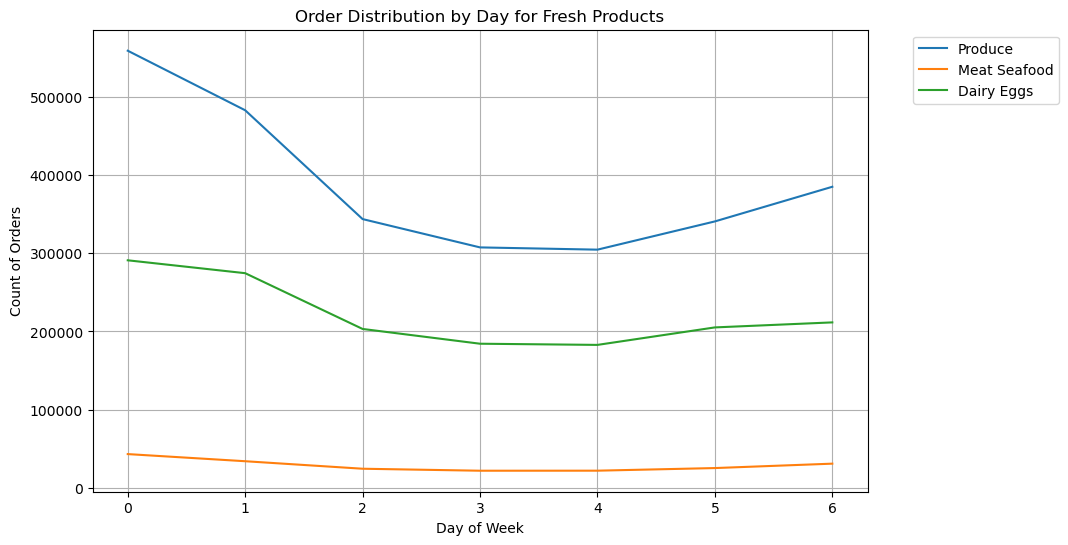

In [29]:
plt.figure(figsize=(10, 6))

for department_id, group in grouped_fresh.groupby('department_id'):
    department_name = ''
    if department_id == 4:
        department_name = 'Produce'
    elif department_id == 12:
        department_name = 'Meat Seafood'
    elif department_id == 16:
        department_name = 'Dairy Eggs'
    else:
        department_name = f'Department {department_id}'
        
    plt.plot(group['orders_day_of_week'], group['order_count'], label=department_name)

plt.xlabel('Day of Week')
plt.ylabel('Count of Orders')
plt.title('Order Distribution by Day for Fresh Products')
plt.legend(title='',loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True) 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','day_fresh_products.png'),bbox_inches='tight')
plt.show()

In [40]:
#filter dataframe to only see beverages and alcohol
drinks = small[small['department_id'].isin([5, 7])]
drinks = drinks[['department_id', 'department', 'order_hour_of_day', 'orders_day_of_week']]

In [41]:
grouped_drinks = drinks.groupby(['department_id', 'order_hour_of_day']).size().reset_index(name='order_count')

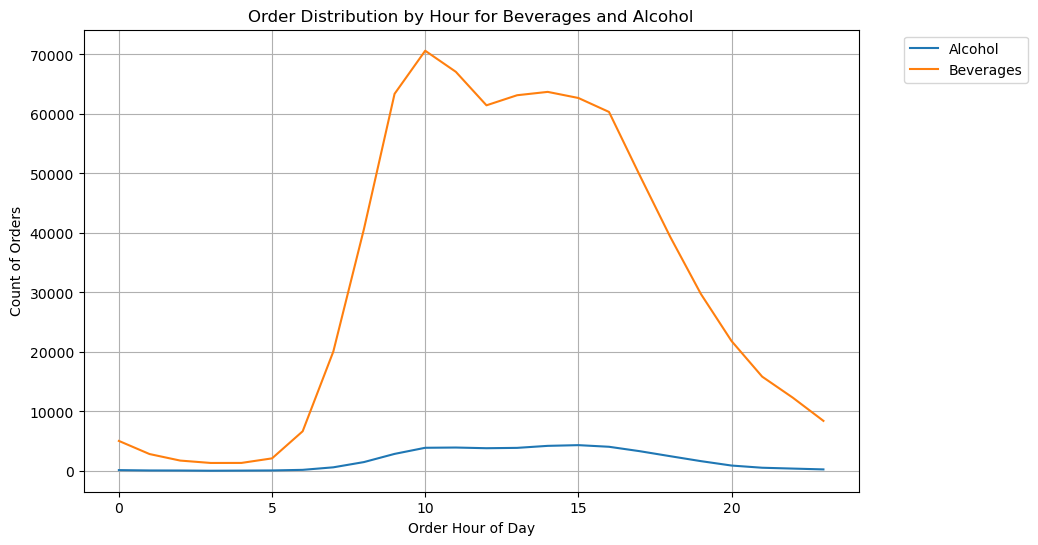

In [42]:
plt.figure(figsize=(10, 6))

for department_id, group in grouped_drinks.groupby('department_id'):
    department_name = ''
    if department_id == 5:
        department_name = 'Alcohol'
    elif department_id == 7:
        department_name = 'Beverages'
    else:
        department_name = f'Department {department_id}'
        
    plt.plot(group['order_hour_of_day'], group['order_count'], label=department_name)

plt.xlabel('Order Hour of Day')
plt.ylabel('Count of Orders')
plt.title('Order Distribution by Hour for Beverages and Alcohol')
plt.legend(title='',loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True) 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','hour_drinks.png'),bbox_inches='tight')
plt.show()

In [43]:
grouped_drinks2 = drinks.groupby(['department_id', 'orders_day_of_week']).size().reset_index(name='order_count')

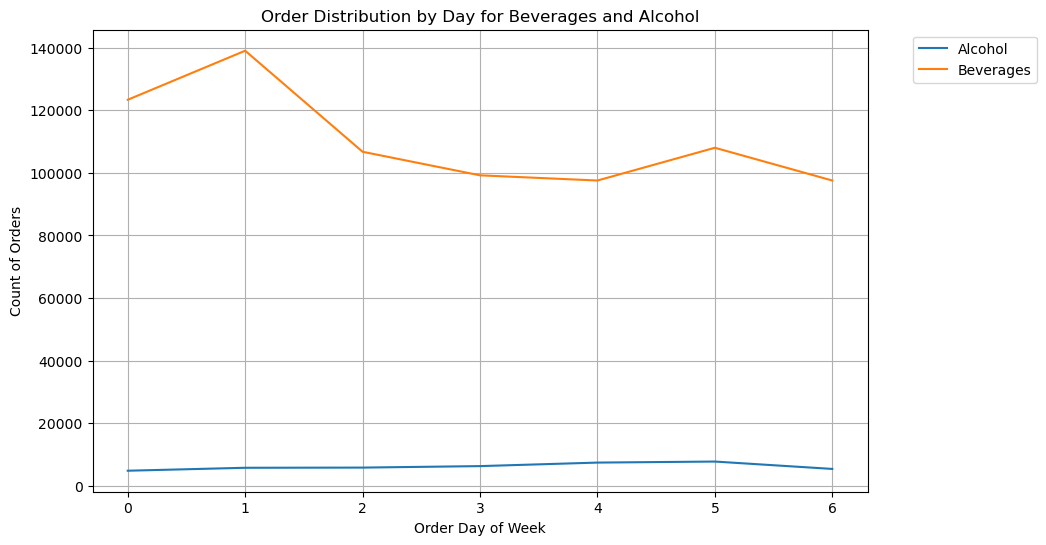

In [45]:
plt.figure(figsize=(10, 6))

for department_id, group in grouped_drinks2.groupby('department_id'):
    department_name = ''
    if department_id == 5:
        department_name = 'Alcohol'
    elif department_id == 7:
        department_name = 'Beverages'
    else:
        department_name = f'Department {department_id}'
        
    plt.plot(group['orders_day_of_week'], group['order_count'], label=department_name)

plt.xlabel('Order Day of Week')
plt.ylabel('Count of Orders')
plt.title('Order Distribution by Day for Beverages and Alcohol')
plt.legend(title='',loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True) 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','day_drinks.png'),bbox_inches='tight')
plt.show()

In [46]:
#filter dataframe to only see frozen products and snacks
frozen = small[small['department_id'].isin([1, 19])]
frozen = frozen[['department_id', 'department', 'order_hour_of_day', 'orders_day_of_week']]

In [47]:
grouped_frozen = frozen.groupby(['department_id', 'order_hour_of_day']).size().reset_index(name='order_count')

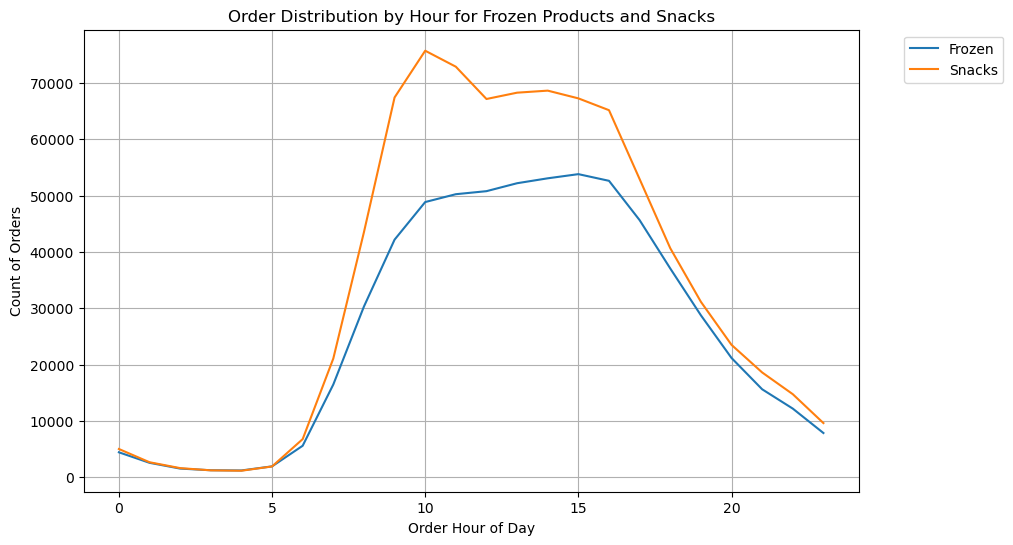

In [48]:
plt.figure(figsize=(10, 6))

for department_id, group in grouped_frozen.groupby('department_id'):
    department_name = ''
    if department_id == 1:
        department_name = 'Frozen'
    elif department_id == 19:
        department_name = 'Snacks'
    else:
        department_name = f'Department {department_id}'
        
    plt.plot(group['order_hour_of_day'], group['order_count'], label=department_name)

plt.xlabel('Order Hour of Day')
plt.ylabel('Count of Orders')
plt.title('Order Distribution by Hour for Frozen Products and Snacks')
plt.legend(title='',loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True) 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','hour_frozen.png'),bbox_inches='tight')
plt.show()

In [49]:
grouped_frozen2 = frozen.groupby(['department_id', 'orders_day_of_week']).size().reset_index(name='order_count')

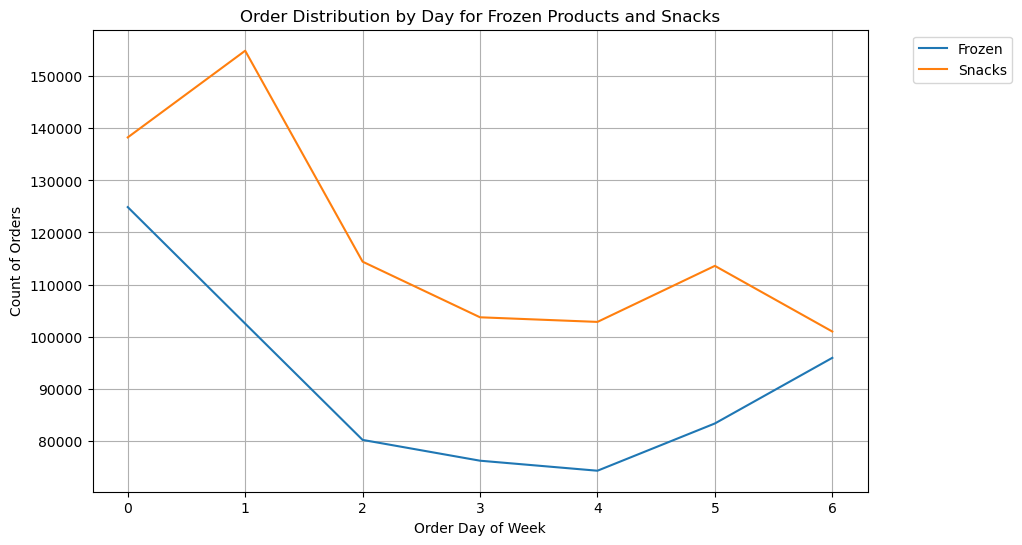

In [53]:
plt.figure(figsize=(10, 6))

for department_id, group in grouped_frozen2.groupby('department_id'):
    department_name = ''
    if department_id == 1:
        department_name = 'Frozen'
    elif department_id == 19:
        department_name = 'Snacks'
    else:
        department_name = f'Department {department_id}'
        
    plt.plot(group['orders_day_of_week'], group['order_count'], label=department_name)

plt.xlabel('Order Day of Week')
plt.ylabel('Count of Orders')
plt.title('Order Distribution by Day for Frozen Products and Snacks')
plt.legend(title='',loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True) 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','day_frozen.png'),bbox_inches='tight')
plt.show()

In [52]:
# Check the top products ordered by Low Income Group
low_income = df_merged[df_merged['income_flag'].isin(['Low Income'])]
low_income = low_income[['income_flag','product_name','department_id']]

In [56]:
# Sorting by quantity ordered and selecting top 10
product_count = low_income['product_name'].value_counts()
top_10_low_income_products = product_count.head(10)

In [58]:
# Creating a colormap with 10 distinct colors
colors = plt.cm.tab10(np.arange(10))

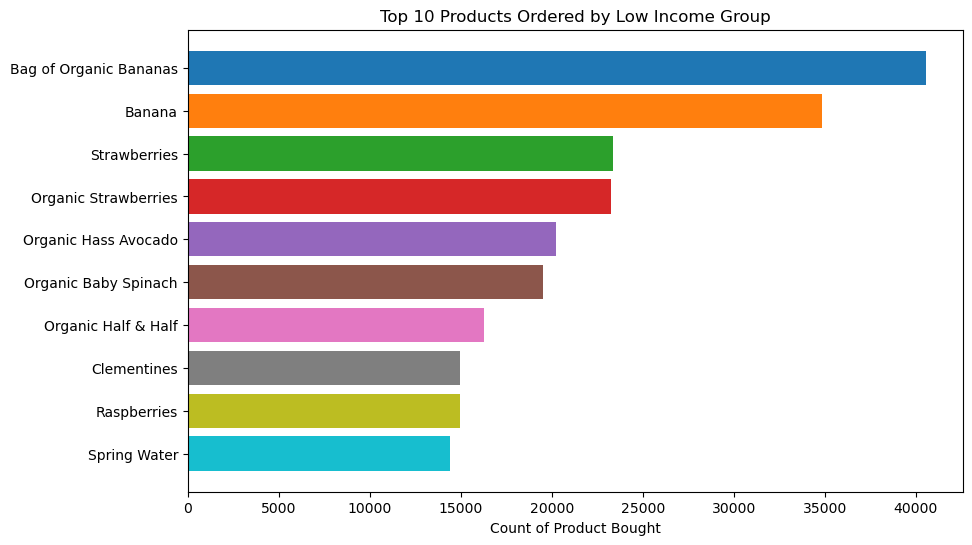

In [66]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_low_income_products.index, top_10_low_income_products.values, color=colors)
plt.xlabel('Count of Product Bought')
plt.ylabel('')
plt.title('Top 10 Products Ordered by Low Income Group')
plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','top_products.png'),bbox_inches='tight')
plt.show()

In [62]:
# Check the top products ordered by New Customer
new_customer = df_merged[df_merged['loyalty_flag'].isin(['New Customer'])]
new_customer = new_customer[['loyalty_flag','product_name']]

In [63]:
# Sorting by quantity ordered and selecting top 10
product_count2 = new_customer['product_name'].value_counts()
top_10_new_customer_products = product_count.head(10)

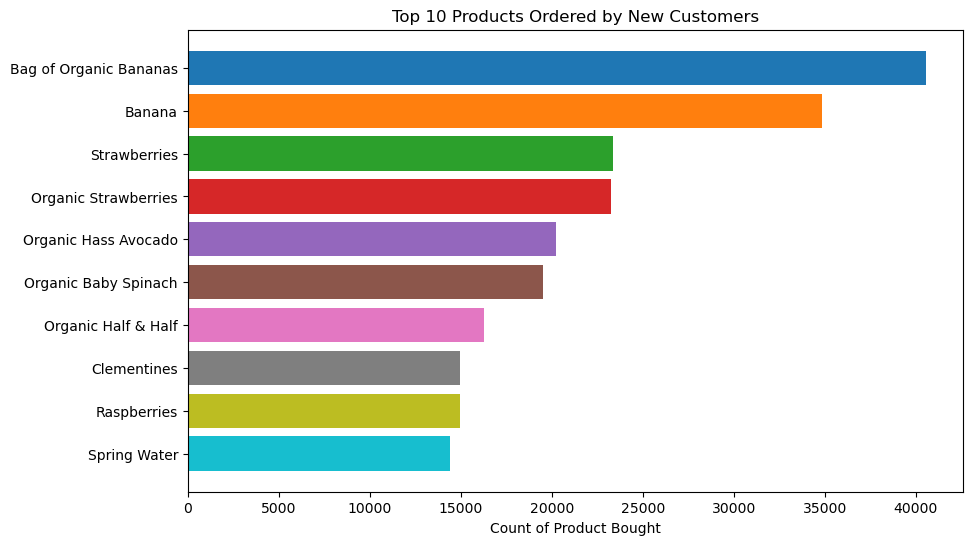

In [67]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_low_income_products.index, top_10_new_customer_products.values, color=colors)
plt.xlabel('Count of Product Bought')
plt.ylabel('')
plt.title('Top 10 Products Ordered by New Customers')
plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','top_products2.png'),bbox_inches='tight')
plt.show()

In [70]:
# Exporting the data
df_merged.to_pickle(os.path.join( path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [71]:
len(df_merged)

30964564